# 互联网金融LeningClub贷款违约预测模型

## 1.项目简介

采用了Lending Club 信用贷款违约数据是美国网络贷款平台 LendingClub 在2018年间的信用贷款情况数据，主要包括贷款状态和还款信息。附加属性包括：信用评分、地址、邮编、所在州等，累计145个属性（列），42535笔 贷款（行）。

贷款违约预测模型，使用了Numpy，Pandas，Sklearn科学计算包完成数据清洗，构建特征工程，以及完成预约模型的训练，数据可视化采用了Matplotlib及Seaborn等可视化包

## 2.信贷数据分析过程

接下来，我们将利用给定的借贷数据，做一次较为完整的数据分析，进一步熟悉数据分析的流程。我们将分三个阶段来完成，分别是

(1)数据的初步分析和整理

(2)数据的探索性分析及可视化

(3)借贷违约预测（LogisticRegression）

### 2.1 数据的初步分析和整理

#### 2.1.1 导入相关数据分析及可视化包

In [1]:
#导入相关库,numpy科学计算库，pandas数据处理库导入
import numpy as np
import pandas as pd

#魔法函数（Magic Functions）可见“%matplotlib inline”就是模仿命令行来访问magic函数的在IPython中独有的形式。
#使用此方法时，绘制命令的输出将在前端显示，直接显示在生成命令的代码单元格的下方，生成的绘图也将存储在笔记本文档中。
%matplotlib inline

#matplotlib数据可视化库导入
import matplotlib.pyplot as plt

#风格设置近似R这种的ggplot库
plt.style.use('ggplot') 

#seaborn定制化作图库
import seaborn as sns
sns.set_style('whitegrid')

**导入LendingClub贷款数据**

In [2]:
#导入数据及预览前三行
data=pd.read_csv("loan.csv")
data.head(3)

D:\python\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


**统计2018年度数据每列的缺失值情况**

In [3]:
#列级别的判断,但凡某一列有null值或空的，则为真
data.isnull().any()

id                                            True
member_id                                     True
loan_amnt                                     True
funded_amnt                                   True
funded_amnt_inv                               True
term                                          True
int_rate                                      True
installment                                   True
grade                                         True
sub_grade                                     True
emp_title                                     True
emp_length                                    True
home_ownership                                True
annual_inc                                    True
verification_status                           True
issue_d                                       True
loan_status                                   True
pymnt_plan                                    True
url                                           True
desc                           

In [4]:
#将列中为空或者null的个数统计出来，并将缺失值最多的排前
#python pandas判断缺失值一般采用isnull()，然而生成的却是所有数据的true／false矩阵
#统计data里每一列空值的个数
data.isnull().sum()

id                                            42535
member_id                                     42536
loan_amnt                                         1
funded_amnt                                       1
funded_amnt_inv                                   1
term                                              1
int_rate                                          1
installment                                       1
grade                                             1
sub_grade                                         1
emp_title                                      2627
emp_length                                     1113
home_ownership                                    1
annual_inc                                        5
verification_status                               1
issue_d                                           1
loan_status                                       1
pymnt_plan                                        1
url                                           42536
desc        

In [5]:
#将列中为空或者null的个数统计出来，并将缺失值最多的排前
#python pandas判断缺失值一般采用isnull()，然而生成的却是所有数据的true／false矩阵
#统计data里每一列空值的个数,data.isnull().any().sum()
total = data.isnull().sum().sort_values(ascending=False)
print(total)

total_cu_tl                       42536
pct_tl_nvr_dlq                    42536
mths_since_recent_bc              42536
mths_since_recent_bc_dlq          42536
mths_since_recent_inq             42536
mths_since_recent_revol_delinq    42536
num_accts_ever_120_pd             42536
num_actv_bc_tl                    42536
num_actv_rev_tl                   42536
num_bc_sats                       42536
num_bc_tl                         42536
num_il_tl                         42536
num_op_rev_tl                     42536
num_rev_accts                     42536
num_rev_tl_bal_gt_0               42536
num_sats                          42536
num_tl_120dpd_2m                  42536
num_tl_30dpd                      42536
num_tl_90g_dpd_24m                42536
mort_acc                          42536
mo_sin_rcnt_tl                    42536
mo_sin_rcnt_rev_tl_op             42536
open_il_24m                       42536
il_util                           42536
open_rv_12m                       42536


In [6]:
#统计每列的缺失值情况
check_null = data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data)) #查看缺失值比例
print(check_null[check_null > 0.2]) # 查看缺失比例大于20%的属性。

total_cu_tl                            1.000000
pct_tl_nvr_dlq                         1.000000
mths_since_recent_bc                   1.000000
mths_since_recent_bc_dlq               1.000000
mths_since_recent_inq                  1.000000
mths_since_recent_revol_delinq         1.000000
num_accts_ever_120_pd                  1.000000
num_actv_bc_tl                         1.000000
num_actv_rev_tl                        1.000000
num_bc_sats                            1.000000
num_bc_tl                              1.000000
num_il_tl                              1.000000
num_op_rev_tl                          1.000000
num_rev_accts                          1.000000
num_rev_tl_bal_gt_0                    1.000000
num_sats                               1.000000
num_tl_120dpd_2m                       1.000000
num_tl_30dpd                           1.000000
num_tl_90g_dpd_24m                     1.000000
mort_acc                               1.000000
mo_sin_rcnt_tl                         1

从上图中可以看出，数据集中有很多列都有缺失值，所以我们要判断此列的数据对预测结果是否有影响，如果没有影响，可以将此列删除，本文中我们将缺失值超过40%的列删除。

In [8]:
#删除缺失值超过40%的列
thresh_count =len(data)*0.4 # 设定阀值
#df.dropna(axis=1,thresh=3)  #将在列的方向上三个为NaN的项删除
#pandas中 axis=1表示列
data_18=data.dropna(thresh=thresh_count, axis=1 ) #若某一列数据缺失的数量超过阀值就会被删除

##### 再次检查缺失值的情况，只有54列的数据还有缺失值

In [9]:
total1 = data_18.isnull().sum().sort_values(ascending=False)
print(total1)

desc                          13294
emp_title                      2627
pub_rec_bankruptcies           1366
emp_length                     1113
chargeoff_within_12_mths        146
collections_12_mths_ex_med      146
tax_liens                       106
revol_util                       91
last_pymnt_d                     84
delinq_2yrs                      30
earliest_cr_line                 30
inq_last_6mths                   30
open_acc                         30
total_acc                        30
pub_rec                          30
delinq_amnt                      30
acc_now_delinq                   30
title                            14
last_credit_pull_d                5
annual_inc                        5
purpose                           1
funded_amnt                       1
funded_amnt_inv                   1
term                              1
pymnt_plan                        1
grade                             1
sub_grade                         1
loan_status                 

In [10]:
#按缺失值比例从大到小排列
data_18.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data_18))

desc                          0.312535
emp_title                     0.061759
pub_rec_bankruptcies          0.032114
emp_length                    0.026166
chargeoff_within_12_mths      0.003432
collections_12_mths_ex_med    0.003432
tax_liens                     0.002492
revol_util                    0.002139
last_pymnt_d                  0.001975
delinq_2yrs                   0.000705
earliest_cr_line              0.000705
inq_last_6mths                0.000705
open_acc                      0.000705
total_acc                     0.000705
pub_rec                       0.000705
delinq_amnt                   0.000705
acc_now_delinq                0.000705
title                         0.000329
last_credit_pull_d            0.000118
annual_inc                    0.000118
purpose                       0.000024
funded_amnt                   0.000024
funded_amnt_inv               0.000024
term                          0.000024
pymnt_plan                    0.000024
grade                    

**查看数据类型的大概分布情况**

In [11]:
# 分类统计数据类型
# value_counts() 返回一个series,其索引为唯一值，其值为频率
# 数组元素的类型通过dtype属性获得
data_18.dtypes.value_counts() 

float64    29
object     25
dtype: int64

从上面可以看到数值型字段有29个，字符型字段有25个，合计54个字段

**使用pandas的loc切片方法，得到每列至少有2个分类特征的数组集**

In [12]:
#loc切片得到每列至少有2个分类特征的数组集
#apply可以把dataframe的一列或几列遍历计算,针对Series(一列)
#nuinque()是查看该序列(axis=0/1对应着列或行)的不同值的数量。用这个函数可以查看数据有多少个不同值。
data_18 = data_18.loc[:,data_18.apply(pd.Series.nunique)!=1]

查看数据的变化，列数少了10列，其中数值型字段为24个，字符型字段为20个，合计44个字段

In [14]:
data_18.dtypes.value_counts()# 分类统计数据类型

float64    24
object     20
dtype: int64

**上述过程，删除了较多缺失值的特征，以下将对有缺失值的特征进行处理**

#### 2.1.2 缺失值处理

Object和float64类型缺失值的处理方法不一样，所以将两者分开进行处理。

***首先处理“Object”分类变量缺失值***

In [15]:
#便于理解将变量命设置为loans
#shape函数是numpy.core.fromnumeric中的函数，它的功能是读取矩阵的长度
loans=data_18
loans.shape

(42536, 44)

**初步了解“Object”变量概况**

In [16]:
#初步了解“Object”变量概况
#pd.set_option('expand_frame_repr', False)   True就是可以换行显示。设置成False的时候不允许换行
#pd.set_option('display.max_rows', 10)显示的最大行数和列数
#DataFrame.select_dtypes(include=None, exclude=None)  通过列类型选取列
#df.describe(include='all')   查看基本统计量 all代表需要将所有列都列出
#T表示转置
pd.set_option('display.max_rows',None)
loans.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
term,42535,2,36 months,31534
int_rate,42535,394,10.99%,970
grade,42535,7,B,12389
sub_grade,42535,35,B3,2997
emp_title,39909,30658,US Army,139
emp_length,41423,11,10+ years,9369
home_ownership,42535,5,RENT,20181
verification_status,42535,3,Not Verified,18758
issue_d,42535,55,Dec-2011,2267
loan_status,42535,4,Fully Paid,34116


**Object分类变量缺失值概况**

In [17]:
#查看“Object”分类变量缺失值概况。
objectColumns = loans.select_dtypes(include=["object"]).columns
loans[objectColumns].isnull().sum().sort_values(ascending=False)

desc                    13294
emp_title                2627
emp_length               1113
revol_util                 91
last_pymnt_d               84
earliest_cr_line           30
title                      14
last_credit_pull_d          5
debt_settlement_flag        1
home_ownership              1
int_rate                    1
grade                       1
sub_grade                   1
loan_status                 1
verification_status         1
issue_d                     1
purpose                     1
zip_code                    1
addr_state                  1
term                        1
dtype: int64

**使用‘unknown’来填充缺失值**

In [19]:
#使用‘unknown’来填充缺失值
#fillna()会填充nan数据，返回填充后的结果
objectColumns = loans.select_dtypes(include=["object"]).columns # 筛选数据类型为object的数据
loans[objectColumns] = loans[objectColumns].fillna("Unknown") #以分类“Unknown”填充缺失值

**确认“Object”分类变量无缺失值**

In [20]:
#查看“Object”分类变量缺失值情况
loans[objectColumns].isnull().sum().sort_values(ascending=False)

debt_settlement_flag    0
last_credit_pull_d      0
int_rate                0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
verification_status     0
issue_d                 0
loan_status             0
desc                    0
purpose                 0
title                   0
zip_code                0
addr_state              0
earliest_cr_line        0
revol_util              0
last_pymnt_d            0
term                    0
dtype: int64

**处理“float64”数值型变量缺失值**

In [21]:
loans.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies       1366
tax_liens                   106
delinq_2yrs                  30
inq_last_6mths               30
open_acc                     30
pub_rec                      30
total_acc                    30
acc_now_delinq               30
delinq_amnt                  30
annual_inc                    5
total_rec_late_fee            1
funded_amnt                   1
funded_amnt_inv               1
installment                   1
dti                           1
last_pymnt_amnt               1
total_rec_int                 1
collection_recovery_fee       1
revol_bal                     1
recoveries                    1
total_pymnt                   1
total_pymnt_inv               1
total_rec_prncp               1
loan_amnt                     1
dtype: int64

**结果发现多个变量存在缺失值，使用mean值来填充缺失值**

In [22]:
#利用sklearn模块中的Imputer模块填充缺失值
numColumns = loans.select_dtypes(include=[np.number]).columns

from sklearn.preprocessing import Imputer

#填补缺失值：sklearn.preprocessing.Imputer(missing_values=’NaN’, strategy=’mean’, axis=0, verbose=0, copy=True)
#missing_values：缺失值，可以为整数或NaN(缺失值numpy.nan用字符串‘NaN’表示)，默认为NaN
#strategy：替换策略，字符串
#若为mean时，用特征列的均值替换
#若为median时，用特征列的中位数替换
#若为most_frequent时，用特征列的众数替换
#axis：指定轴数，默认axis=0代表列，axis=1代表行

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)  # 针对axis=0 列来处理
imr = imr.fit(loans[numColumns])
loans[numColumns] = imr.transform(loans[numColumns])

**再次查看数值变量缺失值**

In [23]:
loans.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

tax_liens                  0
pub_rec_bankruptcies       0
funded_amnt                0
funded_amnt_inv            0
installment                0
annual_inc                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
acc_now_delinq             0
delinq_amnt                0
loan_amnt                  0
dtype: int64

***从上表中可以看到数值变量中已经没有缺失值***

#### 2.1.3 数据过滤

本文的目的是对平台用户的贷款违约做出预测，所以需要筛选得到一些对用户违约有影响的信息，其他不相关的冗余信息，需要将其删除掉。

首先查看所有的分类标签

In [24]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
       'debt_settlement_flag'],
      dtype='object')

***将以上重复或对构建预测模型没有意义的属性进行删除***

In [25]:
#删除对模型没有意义的列
#drop函数的使用：删除行、删除列,drop函数默认删除行，列需要加axis = 1
#采用inplace=True之后，原数组名（如2和3情况所示）对应的内存值直接改变；
#而采用inplace=False之后，原数组名对应的内存值并不改变，需要将新的结果赋给一个新的数组或者覆盖原数组的内存位置
loans2=loans.drop(['int_rate','sub_grade', 'emp_title',  'title', 'zip_code', 'addr_state'], axis=1, inplace = True)
loans3=loans.drop(['issue_d','desc','earliest_cr_line','revol_util' ,'last_pymnt_d','last_credit_pull_d','debt_settlement_flag'], axis=1, inplace = True)

***再次查看‘Object’类型变量，只剩下7个分类变量***

In [26]:
object_columns_df3 =loans.select_dtypes(include=["object"]) #筛选数据类型为object的变量
print(object_columns_df3.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
loan_status             Fully Paid
purpose                credit_card
Name: 0, dtype: object


### 2.2 数据的探索性分析及可视化

数据预处理完后，接下来探索数据的特征工程，为后续的违约预测模型做好建模准备工作

特征工程是机器学习最重要的一部分，希望找到的特征是最贴近实际业务场景的，所以要反复去找特征，只需要最少的特征得到简单的模型，并且有最好的预测效果。

本节将特征工程主要分3大部分：特征抽象 、特征缩放 、特征选择

#### 2.2.1 特征抽象

数据集中有很多的“Object”类型的分类变量存在，但是对于这种变量，机器学习算法不能识别，需要将其转化为算法能识别的数据类型。

有些算法（如罗吉斯回归）要求所有输入项目是数字形式。所以分类变量常被编码为0, 1….(n-1)
有时同一个分类变量可能会有两种表现方式。如，温度可能被标记为“High”， “Medium”， “Low”，“H”， “low”。这里 “High” 和 “H”都代表同一类别。同理， “Low” 和“low”也是同一类别。但Python会把它们当作不同的类别。

**首先对于"loan_status"数据类型转换**

In [27]:
#统计"loan_status"数据的分布
loans['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Unknown                                                    1
Name: loan_status, dtype: int64

**将上表中的违约编码为1，正常的为0进行编码**

In [28]:
#使用Pandas replace函数定义新函数：
#pd.Series(data, index=index)
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
#实现上首先把传入的列转换为Series对象，copy参数表示是否要进行复制
#copy得到的Series对象不会影响到原本DataFrame传入的列，所以可以放心修改
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
#replace的基本结构是：df.replace(to_replace, value) 前面是需要替换的值，后面是替换后的值。
#要注意这样的操作并没有改变文档的源数据，要改变源数据需要使用inplace = True
    return colCoded

#把贷款状态LoanStatus编码为违约=1, 正常=0:
pd.value_counts(loans["loan_status"])
loans["loan_status"] = coding(loans["loan_status"], {'Current':0,'Fully Paid':0\
                                                     ,'In Grace Period':1\
                                                     ,'Late (31-120 days)':1\
                                                     ,'Late (16-30 days)':1\
                                                     ,'Charged Off':1\
                                                     ,"Issued":1\
                                                     ,"Unknown":1\
                                                    ,"Does not meet the credit policy. Status:Fully Paid":1\
                                         ,"Does not meet the credit policy. Status:Charged Off":1})

print( '\nAfter Coding:')
pd.value_counts(loans["loan_status"])


After Coding:


0    34116
1     8420
Name: loan_status, dtype: int64

**可视化查看"loan_status"中不同状态的替换情况**

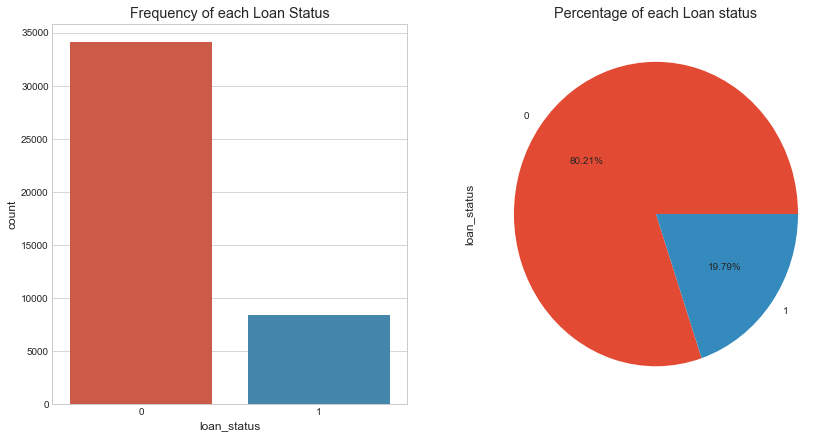

In [29]:
# 贷款状态分布可视化

#通过.sublots()命令来创建新的figure对象, 可以通过设置figsize参数达到目的。
fig, axs = plt.subplots(1,2,figsize=(14,7))
#plt.subplots() 返回一个 Figure实例fig 和一个 AxesSubplot实例ax 。这个很好理解，fig代表整个图像，ax代表坐标轴和画的图。


#Seaborn是基于matplotlib的Python可视化库,它提供了一个高级界面来绘制有吸引力的统计图形.
#countplot一个计数图可以被认为是一个分类直方图，而不是定量的变量
#seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None,
#color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
#x比较容易理解，就是因子所在的列名
#ax: matplotlib Axes, optional #设置子图位置，ax用来指定坐标系
sns.countplot(x='loan_status',data=loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")

loans['loan_status'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

**变量“emp_length”、"grade"进行特征抽象化**

In [30]:
#统计“emp_length”数据的分布
loans['emp_length'].value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Unknown      1113
Name: emp_length, dtype: int64

In [31]:
#统计“grade”数据的分布
loans['grade'].value_counts()

B          12389
A          10183
C           8740
D           6016
E           3394
F           1301
G            512
Unknown        1
Name: grade, dtype: int64

In [32]:
# 构建mapping，对有序变量"emp_length”、“grade”进行转换
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "Unknown": 0
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7,
        "Unknown": 7
    }
}

loans = loans.replace(mapping_dict) #变量映射
loans[['emp_length','grade']].head() #查看效果

,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
4,1,2


**变量"home_ownership", "verification_status","purpose", "term" 狂热编码**

In [33]:
#统计“home_ownership”数据的分布
loans['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Unknown         1
Name: home_ownership, dtype: int64

In [34]:
#统计“verification_status”数据的分布
loans['verification_status'].value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Unknown                1
Name: verification_status, dtype: int64

In [35]:
#统计“purpose”数据的分布
loans['purpose'].value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Unknown                   1
Name: purpose, dtype: int64

In [36]:
#统计“term”数据的分布
loans['term'].value_counts()

 36 months    31534
 60 months    11001
Unknown           1
Name: term, dtype: int64

In [37]:
#变量狂热编码
n_columns = ["home_ownership", "verification_status","purpose", "term"] 
dummy_df = pd.get_dummies(loans[n_columns])# 用get_dummies进行one hot编码
loans = pd.concat([loans, dummy_df], axis=1) #当axis = 1的时候，concat就是行对齐，然后将不同列名称的两张表合并
loans = loans.drop(n_columns, axis=1)  #清除原来的分类变量

重新查看数据集中的数据类型

In [38]:
loans.info() #查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 55 columns):
loan_amnt                              42536 non-null float64
funded_amnt                            42536 non-null float64
funded_amnt_inv                        42536 non-null float64
installment                            42536 non-null float64
grade                                  42536 non-null int64
emp_length                             42536 non-null int64
annual_inc                             42536 non-null float64
loan_status                            42536 non-null int64
dti                                    42536 non-null float64
delinq_2yrs                            42536 non-null float64
inq_last_6mths                         42536 non-null float64
open_acc                               42536 non-null float64
pub_rec                                42536 non-null float64
revol_bal                              42536 non-null float64
total_acc                    

#### 2.2.2 特征缩放

采用标准化的方法进行去量纲操作，加快算法收敛速度，采用scikit-learn模块preprocessing的子模块StandardScaler进行操作。

In [39]:
col = loans.select_dtypes(include=['int64','float64']).columns
col = col.drop('loan_status') #剔除目标变量
loans_ml_df = loans # 复制数据至变量loans_ml_df


#sklearn中的数据预处理preprocessing模块，它可以对数据进行标准化。preprocessing 模块提供了数据预处理函数和预处理类，
#预处理类主要是为了方便添加到pipeline 过程中。
from sklearn.preprocessing import StandardScaler # 导入模块
#classpreprocessing.StandardScaler(copy=True, with_mean=True,with_std=True)：标准正态分布化的类

sc =StandardScaler() # 初始化缩放器

#fit_transform(X[, y])：根据 X设置标准化缩放比例并标准化
#fit(X[,y])：根据数据 X 的值，设置标准化缩放的比例
#transform(X[,y, copy])：用之前设置的比例标准化 X
loans_ml_df[col] =sc.fit_transform(loans_ml_df[col]) #对数据进行标准化
loans_ml_df.head() #查看经标准化后的数据

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,term_Unknown
0,-0.821740,-0.814578,-0.724250,-0.764653,-0.466416,1.442763,-0.704248,0,2.122602,-0.297624,...,0,0,0,0,0,0,0,1,0,0
1,-1.159087,-1.164388,-1.071305,-1.257851,0.228730,-1.328727,-0.610633,1,-1.839541,-0.297624,...,0,0,0,0,0,0,0,0,1,0
2,-1.172581,-1.178380,-1.085328,-1.140582,0.228730,1.442763,-0.887548,0,-0.691783,-0.297624,...,0,0,0,0,1,0,0,1,0,0
3,-0.147046,-0.114959,-0.019623,0.079871,0.228730,1.442763,-0.311062,0,0.985252,-0.297624,...,0,0,1,0,0,0,0,1,0,0
4,-1.091618,-1.094426,-1.001193,-1.219750,-0.466416,-1.051578,0.169498,0,0.678985,-0.297624,...,0,0,1,0,0,0,0,0,1,0


**以上过程完成了非数值型特征抽象化处理，使得算法能理解数据集中的数据，这么多的特征，究竟哪些特征对预测结果影响较大，所以以下通过影响大小对特征进行选择。**

#### 2.2.3 特征选择

特征的选择优先选取与预测目标相关性较高的特征，不相关特征可能会降低分类的准确率，因此为了增强模型的泛化能力，我们需要从原有特征集合中挑选出最佳的部分特征，并且降低学习的难度，能够简化分类器的计算，同时帮助了解分类问题的因果关系。

一般来说，根据特征选择的思路将特征选择分为3种方法：
嵌入方法（embedded approach）、过滤方法（filter approach）、包装方法（wrapper approacch）。

过滤方法（filter approach）: 通过自变量之间或自变量与目标变量之间的关联关系选择特征。

嵌入方法（embedded approach）: 通过学习器自身自动选择特征。

包装方法（wrapper approacch）: 通过目标函数（AUC/MSE）来决定是否加入一个变量。
本次项目采用Filter、Embedded和Wrapper三种方法组合进行特征选择。

首先将数据集中的贷款状态'loan_status'抽离出来

In [40]:
#构建X特征变量和Y目标变量
x_feature = list(loans_ml_df.columns)
x_feature.remove('loan_status')
x_val= loans_ml_df[x_feature]
y_val= loans_ml_df['loan_status']
len(x_feature) # 查看初始特征集合的数量

54

**重新查看没有贷款状态'loan_status'的数据集**

In [41]:
x_val.describe().T # 初览数据

,count,mean,std,min,25%,50%,75%,max
loan_amnt,42536.0,-6.867936e-15,1.000012,-1.428965,-0.794752,-0.187528,0.527648,3.226425
funded_amnt,42536.0,-9.159408e-15,1.000012,-1.444236,-0.814578,-0.170929,0.584660,3.383136
funded_amnt_inv,42536.0,1.576018e-15,1.000012,-1.421866,-0.727756,-0.229959,0.541274,3.485985
installment,42536.0,-3.633725e-16,1.000012,-1.469221,-0.751897,-0.215047,0.505125,4.703026
grade,42536.0,-4.502109e-14,1.000012,-1.161561,-0.466416,-0.466416,0.923876,3.009313
emp_length,42536.0,-1.408244e-14,1.000012,-1.328727,-0.774429,-0.220131,1.165614,1.442763
annual_inc,42536.0,1.887093e-16,1.000012,-1.049128,-0.454606,-0.158157,0.208505,92.536967
dti,42536.0,8.617696e-17,1.000012,-1.988215,-0.769093,0.014415,0.789003,2.470498
delinq_2yrs,42536.0,-2.851842e-15,1.000012,-0.297624,-0.297624,-0.297624,-0.297624,25.082109
inq_last_6mths,42536.0,-4.968794e-14,1.000012,-0.708249,-0.708249,-0.053326,0.601596,20.904195


**Wrapper方法**

选出与目标变量相关性较高的特征。通过暴力的递归特征消除 (Recursive Feature Elimination)方法筛选30个与目标变量相关性最强的特征，将特征维度从59个降到30个。

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# 建立逻辑回归分类器
model = LogisticRegression()
# 建立递归特征消除筛选器
rfe = RFE(model, 30) #通过递归选择特征，选择30个特征
rfe = rfe.fit(x_val, y_val)
# 打印筛选结果
print(rfe.support_)
print(rfe.ranking_) #ranking 为 1代表被选中，其他则未被代表未被选中

[ True  True  True  True  True False  True False False  True False False
  True False  True  True  True  True False  True  True  True  True False
 False False  True  True  True  True  True False  True False False  True
 False  True False False  True False False False False  True  True False
  True False False  True  True False]
[ 1  1  1  1  1  7  1 15 11  1  5 12  1 10  1  1  1  1  8  1  1  1  1  9 17
 25  1  1  1  1  1 20  1 21 19  1 18  1  2  4  1 13 14  3 23  1  1 16  1  6
 24  1  1 22]


**通过布尔值筛选首次降维后的变量**

In [43]:
col_filter = x_val.columns[rfe.support_] #通过布尔值筛选首次降维后的变量
col_filter # 查看通过递归特征消除法筛选的变量

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'grade',
       'annual_inc', 'inq_last_6mths', 'revol_bal', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'acc_now_delinq',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_educational', 'purpose_moving', 'purpose_other',
       'purpose_small_business', 'term_ 36 months', 'term_ 60 months'],
      dtype='object')

**Filter方法**

正常情况下，影响目标变量的因数是多元性的；但不同因数之间会互相影响（共线性 ），或相重叠，进而影响到统计结果的真实性。下一步，以下通过皮尔森相关性图谱找出冗余特征并将其剔除，且通过相关性图谱进一步引导我们选择特征的方向。

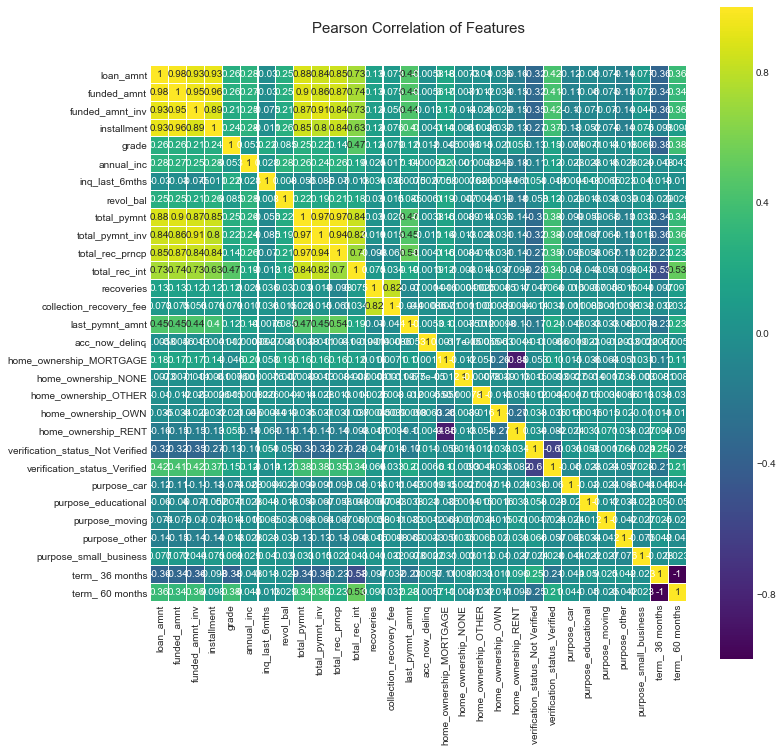

In [44]:
#heatmap主要用于分析特征的两两相关
#seaborn.heatmap(data, vmin=None, vmax=None,cmap=None, center=None, robust=False, annot=None, fmt=’.2g’, 
#annot_kws=None,linewidths=0, linecolor=’white’, cbar=True, cbar_kws=None, cbar_ax=None,square=False, 
#xticklabels=’auto’, yticklabels=’auto’, mask=None, ax=None,**kwargs)
#linewidths:定义热力图里“表示两两特征关系的矩阵小块”之间的间隔大小
#square:设置热力图矩阵小块形状，默认值是False
#cbar:是否在热力图侧边绘制颜色刻度条，默认值是True
#annot(annotate的缩写):默认取值False；如果是True，在热力图每个方格写入数据；如果是矩阵，在热力图每个方格写入该矩阵对应位置数据
#vmax,vmin:分别是热力图的颜色取值最大和最小范围，默认是根据data数据表里的取值确定
#cmap:从数字到色彩空间的映射，取值是matplotlib包里的colormap名称或颜色对象，或者表示颜色的列表,viridis	蓝-绿-黄

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)

#data.corr() #相关系数矩阵，即给出了任意两个变量之间的相关系数
sns.heatmap(loans_ml_df[col_filter].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**从上图中得到需要删除的冗余特征**

In [45]:
drop_col = ['collection_recovery_fee','funded_amnt', 'funded_amnt_inv','installment',
                       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'home_ownership_OWN', 'home_ownership_RENT' ,
                       'term_ 36 months', 'total_pymnt']
col_new = col_filter.drop(drop_col) #剔除冗余特征
print(len(col_new))

19


**特征从30个降到19个，再次确认处理后的数据相关性**

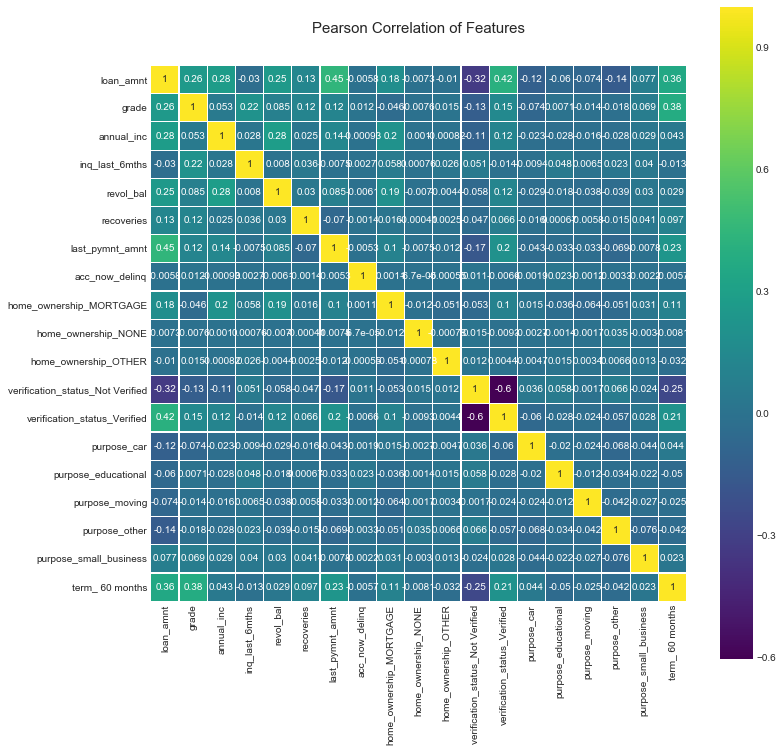

In [46]:
col_new # 查看剩余的特征
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(loans_ml_df[col_new].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**Embedded方法**

为了了解每个特征对贷款违约预测的影响程度，所以在进行模型训练之前，我们需要对特征的权重有一个正确的评判和排序，就可以通过特征重要性排序来挖掘哪些变量是比较重要的，降低学习难度，最终达到优化模型计算的目的

In [47]:
#随机森林算法判定特征的重要性
names = loans_ml_df[col_new].columns

from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
#bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

#n_estimators 森林里（决策）树的数目
#random_state 随机数生成器使用的种子

clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
clf.fit(x_val[col_new], y_val) #对自变量和因变量进行拟合
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('loan_amnt', 0.02182366023015948)
('grade', 0.039768944151800462)
('annual_inc', 0.022749240278086016)
('inq_last_6mths', 0.13101894401985925)
('revol_bal', 0.039079598843454265)
('recoveries', 0.66308392499621216)
('last_pymnt_amnt', 0.05424787392047152)
('acc_now_delinq', 0.0031656713070168457)
('home_ownership_MORTGAGE', 0.002636694846438737)
('home_ownership_NONE', 4.9238357990386052e-05)
('home_ownership_OTHER', 0.00073003540169749642)
('verification_status_Not Verified', 0.0049249130848894821)
('verification_status_Verified', 0.0015610232609141429)
('purpose_car', 0.0010245128583567392)
('purpose_educational', 0.001020236028437206)
('purpose_moving', 0.00048842241870673743)
('purpose_other', 0.0016317911970014358)
('purpose_small_business', 0.0023029883943198924)
('term_ 60 months', 0.008692286404187774)


**特征重要性从大到小排序及可视化图形，结果发现最具判别效果的特征是收到的最后付款总额'recoveries'**

### 2.3 借贷违约预测模型（LogisticRegression）

#### 2.3.1 样本不平衡处理

本项目中，2018年度贷款平台上违约的借款人比例很低，约为19.79%，正负样本量非常不平衡，非平衡样本常用的解决方式有2种：

过采样（oversampling），增加正样本使得正、负样本数目接近，然后再进行学习。
欠采样（undersampling），去除一些负样本使得正、负样本数目接近，然后再进行学习。 构建自变量和因变量

In [48]:
X = loans_ml_df[col_new]
y = loans_ml_df["loan_status"]

#shape函数是numpy.core.fromnumeric中的函数，它的功能是读取矩阵的长度，比如shape[0]就是读取矩阵第一维度的长度。
#三维时a.shape【0】表示创建的块数，a.shape【1】和a.shape【2】表示每一块（每一块都是二维的）的行数和列数
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
n_pos_sample / n_sample,
n_neg_sample / n_sample))
print('特征维数：', X.shape[1])

样本个数：42536; 正样本占80.21%; 负样本占19.79%
特征维数： 19


In [49]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块

#类不平衡（class-imbalance）是指在训练分类器中所使用的训练集的类别分布不均。
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
#ratio用于指定重抽样的比例
#random_state：用于指定随机数生成器的种子

X, y = sm.fit_sample(X, y)

print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

通过SMOTE方法平衡正负样本后
样本个数：68232; 正样本占50.00%; 负样本占50.00%


#### 2.3.2 模型训练

采用逻辑回归分类器 分类器进行训练

In [50]:
# 构建逻辑回归分类器
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression() 
clf1.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**查看预测结果的准确率**

In [51]:
predicted1 = clf.predict(X) # 通过分类器产生预测结果
from sklearn.metrics import accuracy_score
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y,)))

Test set accuracy score: 0.99087


**利用混淆矩阵及可视化观察预测结果**

In [52]:
#生成混淆矩阵
from sklearn.metrics import confusion_matrix
m=confusion_matrix(y, predicted1)

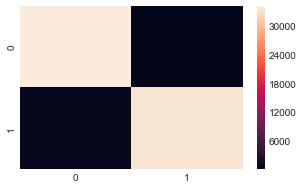

In [53]:
# 混淆矩阵可视化
plt.figure(figsize=(5,3))
sns.heatmap(m)

**再利用sklearn.metrics子模块classification_report查看precision、recall、f1-score的值**

In [228]:
#查看precision、recall、f1-score的值
from sklearn.metrics import classification_report
print(classification_report(y, predicted1))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     34116
          1       1.00      0.98      0.99     34116

avg / total       0.99      0.99      0.99     68232



In [54]:
#计算ROC值
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(y, predicted1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.990869


**以上完成了全部的模型训练及预测工作。**

## 3. 小结

本文基于互联网金融平台2018年度贷款数据完成信贷违约预测模型，全文包括了数据清洗，构建特征工程，训练模型，最后得到的模型准确率达到了0.99，召回率达到了0.99，具有较好的预测性，本文的模型可以作为信贷平台预测违约借款人的参考